## Setting

In [1]:
""" Solution for simple linear regression example using tf.data
Created by Chip Huyen (chiphuyen@cs.stanford.edu)
CS20: "TensorFlow for Deep Learning Research"
cs20.stanford.edu
Lecture 03
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\home\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#create data loading function in util.py
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

def huber_loss(labels, predictions, delta=14.0):
    residual = tf.abs(labels - predictions)
    def f1(): return 0.5 * tf.square(residual)
    def f2(): return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(residual < delta, f1, f2)

In [3]:
DATA_FILE = '../stanford-tensorflow-tutorials-master/examples/data/birth_life_2010.txt'

# Step 1: read in the data
data, n_samples = read_birth_life_data(DATA_FILE)

In [4]:
# Step 2: create Dataset and iterator
dataset = tf.data.Dataset.from_tensor_slices((data[:,0], data[:,1]))

iterator = dataset.make_initializable_iterator()
X,Y = iterator.get_next()

In [5]:
# Step 3: create weight and bias, initialized to 0
w = tf.get_variable(name='weight', initializer=tf.constant((0.0)))
b = tf.get_variable(name='bias', initializer=tf.constant((0.0)))

In [6]:
# Step 4: build model to predict Y
y_pred = X * w + b

In [7]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - y_pred, name='loss')
h_loss = huber_loss(Y, y_pred)

In [8]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
h_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(h_loss)

In [9]:
start = time.time()
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(logdir='./graphs/lin_data', graph=sess.graph)
    
    # Step 8: train the model for 100 epochs
    for i in range(100):
        sess.run(iterator.initializer)
        total_loss = 0
        try:
            while True:
                _, l= sess.run([optimizer, loss])
                total_loss += l
        except tf.errors.OutOfRangeError:
            pass
        
        print('Epoch {}: {}'.format(i, total_loss/n_samples))
    
    # close the writer when you're done using it
    writer.close()
    
    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w,b])
    print('w :{}, b: {}'.format(w_out,b_out))
    
    print('=======huber_loss=======')
#huber_loss
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(logdir='./graphs/lin_data', graph=sess.graph)
    
    # Step 8: train the model for 100 epochs
    for i in range(100):
        sess.run(iterator.initializer)
        total_loss = 0
        try:
            while True:
                _, l= sess.run([h_optimizer, h_loss])
                total_loss += l
        except tf.errors.OutOfRangeError:
            pass
        
        print('Epoch {}: {}'.format(i, total_loss/n_samples))
    
    # close the writer when you're done using it
    writer.close()
    
    # Step 9: output the values of w and b
    h_w_out, h_b_out = sess.run([w,b])
    print('w :{}, b: {}'.format(h_w_out,h_b_out))
    
print('Took: %f seconds' %(time.time() - start))

Epoch 0: 1661.863764550287
Epoch 1: 956.3224439573916
Epoch 2: 844.6737683409139
Epoch 3: 750.7312372197838
Epoch 4: 667.659830722252
Epoch 5: 594.1417484349327
Epoch 6: 529.0787271179651
Epoch 7: 471.5003584364135
Epoch 8: 420.5458252520938
Epoch 9: 375.45531067297253
Epoch 10: 335.55436177954664
Epoch 11: 300.24627770512666
Epoch 12: 269.00374521501146
Epoch 13: 241.3595776562824
Epoch 14: 216.9003910217238
Epoch 15: 195.25972397061292
Epoch 16: 176.1137731664483
Epoch 17: 159.17551683403158
Epoch 18: 144.19069889799545
Epoch 19: 130.93503690609023
Epoch 20: 119.20935661137888
Epoch 21: 108.83793506244884
Epoch 22: 99.66458668207358
Epoch 23: 91.55171666162971
Epoch 24: 84.37658985632197
Epoch 25: 78.03213362396008
Epoch 26: 72.42178616552172
Epoch 27: 67.46132107331957
Epoch 28: 63.07563027821873
Epoch 29: 59.19871881428714
Epoch 30: 55.77163058824279
Epoch 31: 52.742706123048954
Epoch 32: 50.06563247971506
Epoch 33: 47.70006537150391
Epoch 34: 45.61017402416389
Epoch 35: 43.7637948

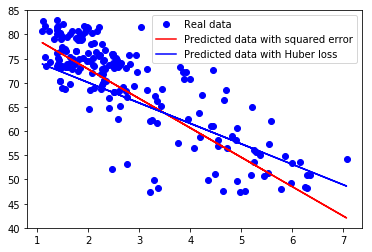

In [10]:
# plot the results
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data with squared error')
plt.plot(data[:,0], data[:,0] * h_w_out + h_b_out, 'b', label='Predicted data with Huber loss')
plt.legend()
plt.show()